In [173]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error



In [174]:
df_modeling = pd.read_csv(filepath_or_buffer= "../data/Dataset_for_modeling.csv") 
df_modeling

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice,Category_Arcade,Category_Books & Reference,Category_Business,...,Category_Productivity,Category_Puzzle,Category_Shopping,Category_Social,Category_Sports,Category_Tools,Category_Travel & Local,Category_other,Content_Rating_Everyone,Content_Rating_Not for Everyone
0,3.9,68.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4.3,918.0,1,0.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,5.0,6.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,830.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9658,0.0,0.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9659,4.3,142.0,1,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9660,5.0,9.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9661,0.0,0.0,1,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train-Test-Split

In [175]:
X = df_modeling.drop(columns= 'Rating')
y = df_modeling['Rating']

In [176]:
X.shape

(9663, 29)

In [177]:
y.shape

(9663,)

In [178]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.2, random_state = 1234)

In [179]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [10, 20, 30],
        'model__min_samples_split' :[2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=5; total time=   0.0s
[C

[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=2; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=5; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=5; total time=   0.2s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=10; total time=   0.1s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=10; total time=   0.0s
[CV] END model__max_depth=10, model__min_samples_leaf=4, model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [10, 20, 30],
                          'model__min_samples_leaf': [1, 2, 4],
                          'model__min_samples_split': [2, 5, 10]}],
             verbose=2)

In [180]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 5} with a score of 0.94


We run the model withouth the pca. We can see that the model max_depth reach the minimum range (how deep the tree is) 
the model__min_samples_leaf reach the top range(minumum number of sample at the base of the tree)
the model__min_sample_split reacht the top range(minimum number of samples required to split an internal node) 
We are going to rerun the model with different hyperparameters range and add pca. 


In [181]:
y_pred1 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)



Mean Absolute Error (MAE): 0.28116407173442576
Coefficient of Determination (R-squared): 0.944296351983478


In [182]:
grid_search.score(X_test, y_test)

0.944296351983478

In [183]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [6, 8, 10, 12, 14],
        'model__min_samples_split' :[2, 4],
        'pca' : [PCA()],
        'pca__n_components' : [10, 20, 29],
        'model__min_samples_leaf': [1, 2, 3]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [6, 8, 10, 12, 14],
                          'model__min_samples_leaf': [1, 2, 3],
                          'model__min_samples_split': [2, 4],
                          'pca': [PCA(n_components=20)],
                          'pca__n_components': [10, 20, 29]}],
             verbose=1)

In [184]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': 14, 'model__min_samples_leaf': 3, 'model__min_samples_split': 4, 'pca': PCA(n_components=20), 'pca__n_components': 20} with a score of 0.82


For this model the max depth is only at 2 (the lowest range), the min samples leaf is at 6 (middle range) and the min samples split is at 10 (lowest range).


In [185]:
y_pred2 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)


print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)



Mean Absolute Error (MAE): 0.4342807178150561
Coefficient of Determination (R-squared): 0.8416094691552864


In [186]:
grid_search.score(X_test, y_test)

0.8416094691552864

In [187]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [12, 13, 14, 15, 16],
        'model__min_samples_split' :[1, 2, 3, 4, 5],
        'pca' : [PCA()],
        'pca__n_components' : [15, 20, 25],
        'model__min_samples_leaf': [1, 2]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [12, 13, 14, 15, 16],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [1, 2, 3, 4, 5],
                          'pca': [PCA(n_components=20)],
                          'pca__n_components': [15, 20, 25]}],
             verbose=1)

In [188]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': 16, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'pca': PCA(n_components=20), 'pca__n_components': 20} with a score of 0.83


For this model the max depth is only at 1, the min samples leaf is at 1(lower range) and the min samples split is at 8 (upper range).

In [189]:
y_pred3 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)


print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)


Mean Absolute Error (MAE): 0.4261793228553117
Coefficient of Determination (R-squared): 0.8404716715288201


In [190]:
grid_search.score(X_test, y_test)

0.8404716715288201

In [191]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [12, 13, 14, 15, 16],
        'model__min_samples_split' :[1, 2, 3, 4, 5],
        'pca' : [PCA()],
        'pca__n_components' : [15, 20, 25],
        'model__min_samples_leaf': [1, 2]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\lelon\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [12, 13, 14, 15, 16],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [1, 2, 3, 4, 5],
                          'pca': [PCA(n_components=20)],
                          'pca__n_components': [15, 20, 25]}],
             verbose=1)

In [192]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': 16, 'model__min_samples_leaf': 2, 'model__min_samples_split': 3, 'pca': PCA(n_components=20), 'pca__n_components': 20} with a score of 0.84


In [193]:
y_pred4 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)


print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)


Mean Absolute Error (MAE): 0.4261793228553117
Coefficient of Determination (R-squared): 0.8404716715288201


In [194]:
grid_search.score(X_test, y_test)

0.8368787316824119

In [195]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [15, 16, 17],
        'model__min_samples_split' :[2, 3, 4],
        'pca' : [PCA()],
        'pca__n_components' : [19, 20, 21],
        'model__min_samples_leaf': [1, 2]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [15, 16, 17],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 3, 4],
                          'pca': [PCA(n_components=20)],
                          'pca__n_components': [19, 20, 21]}],
             verbose=1)

In [196]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': 17, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4, 'pca': PCA(n_components=20), 'pca__n_components': 20} with a score of 0.84


In [197]:
y_pred5 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)


print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)


Mean Absolute Error (MAE): 0.4261793228553117
Coefficient of Determination (R-squared): 0.8404716715288201


In [198]:
grid_search.score(X_test, y_test)

0.8456939754116228

In [199]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [16, 17, 18],
        'model__min_samples_split' :[3, 4, 5],
        'pca' : [PCA()],
        'pca__n_components' : [19, 20, 21],
        'model__min_samples_leaf': [1, 2]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [16, 17, 18],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [3, 4, 5],
                          'pca': [PCA(n_components=20)],
                          'pca__n_components': [19, 20, 21]}],
             verbose=1)

In [200]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': 18, 'model__min_samples_leaf': 2, 'model__min_samples_split': 4, 'pca': PCA(n_components=20), 'pca__n_components': 20} with a score of 0.84


In [201]:
y_pred7 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)


print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)


Mean Absolute Error (MAE): 0.4261793228553117
Coefficient of Determination (R-squared): 0.8404716715288201


In [202]:
grid_search.score(X_test, y_test)

0.8475171989098613

In [203]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('model',DecisionTreeRegressor())
])

Params = [{
        'model__max_depth' : [17, 18, 19],
        'model__min_samples_split' :[2, 3, 4],
        'pca' : [PCA()],
        'pca__n_components' : [18, 19, 20],
        'model__min_samples_leaf': [1, 2]}]

grid_search = GridSearchCV(estimator=pipeline, param_grid=Params, cv=5, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', DecisionTreeRegressor())]),
             param_grid=[{'model__max_depth': [17, 18, 19],
                          'model__min_samples_leaf': [1, 2],
                          'model__min_samples_split': [2, 3, 4],
                          'pca': [PCA(n_components=20)],
                          'pca__n_components': [18, 19, 20]}],
             verbose=1)

In [204]:
print("Best parameters are %s with a score of %0.2f"
% (grid_search.best_params_, grid_search.best_score_))

Best parameters are {'model__max_depth': 19, 'model__min_samples_leaf': 2, 'model__min_samples_split': 3, 'pca': PCA(n_components=20), 'pca__n_components': 20} with a score of 0.85


In [205]:
y_pred6 = grid_search.predict(X_test)

mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)


print("Mean Absolute Error (MAE):", mae)
print("Coefficient of Determination (R-squared):", r2)


Mean Absolute Error (MAE): 0.4261793228553117
Coefficient of Determination (R-squared): 0.8404716715288201


In [206]:
grid_search.score(X_test, y_test)

0.8475549484953752

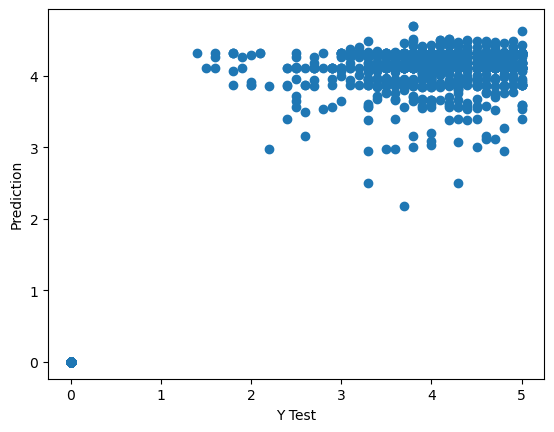

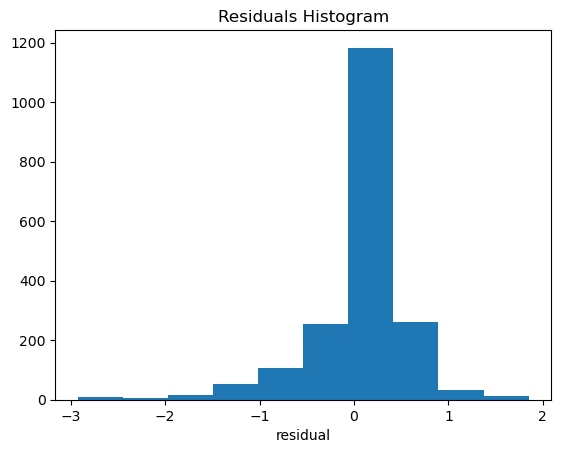

In [207]:
metrics.r2_score(y_test, y_pred1)

plt.scatter(y_test, y_pred1)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred1])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()


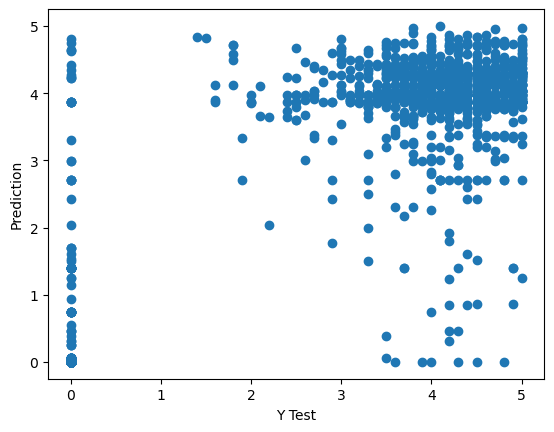

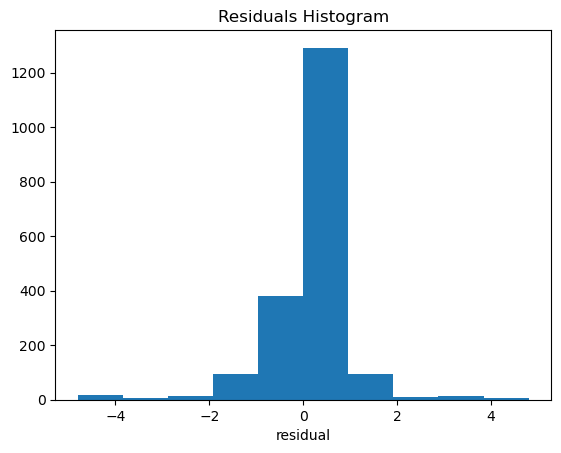

In [208]:
metrics.r2_score(y_test, y_pred2)

plt.scatter(y_test, y_pred2)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred2])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()


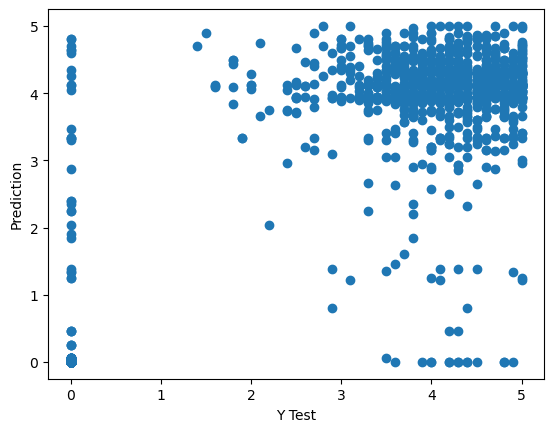

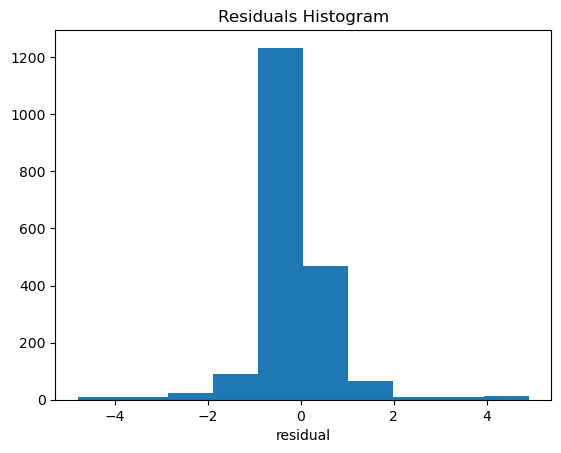

In [209]:
metrics.r2_score(y_test, y_pred3)

plt.scatter(y_test, y_pred3)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred3])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()


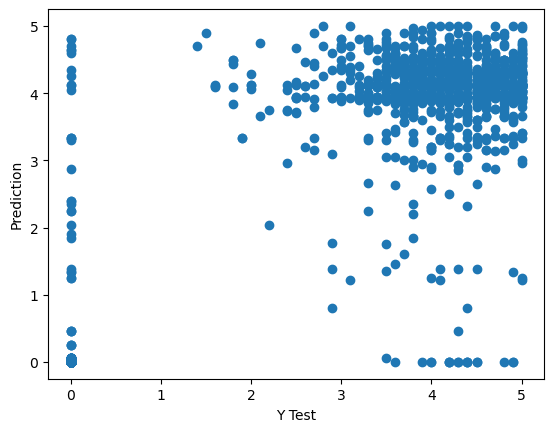

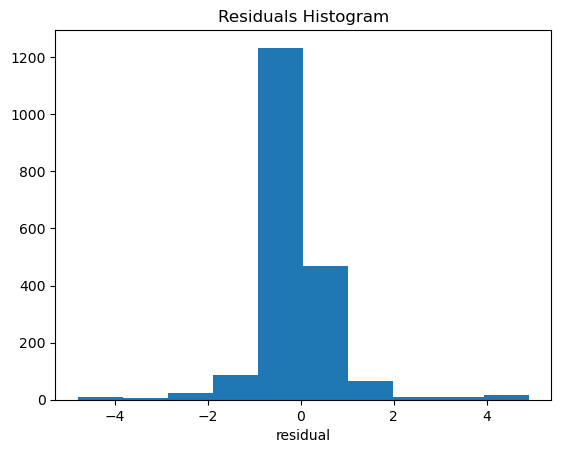

In [210]:
metrics.r2_score(y_test, y_pred4)

plt.scatter(y_test, y_pred4)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred4])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()


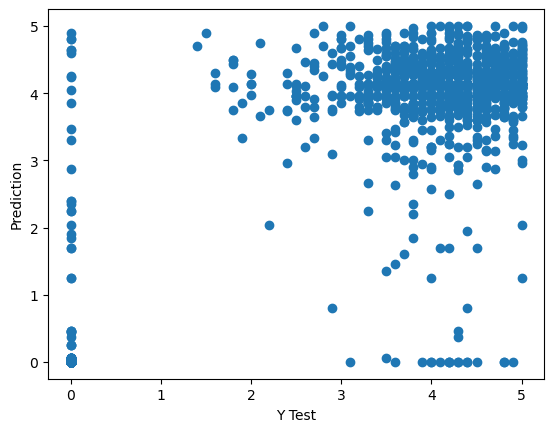

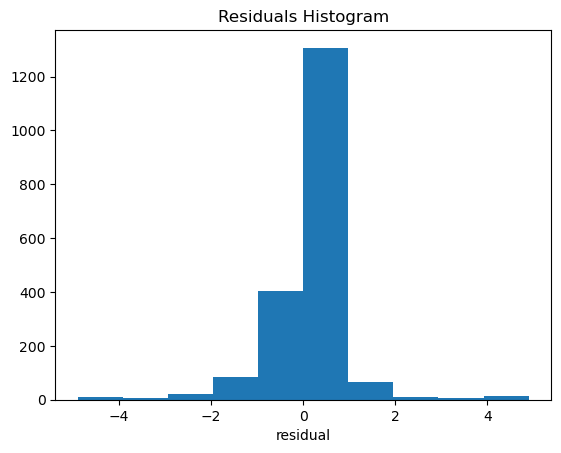

In [211]:
metrics.r2_score(y_test, y_pred5)

plt.scatter(y_test, y_pred5)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred5])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()


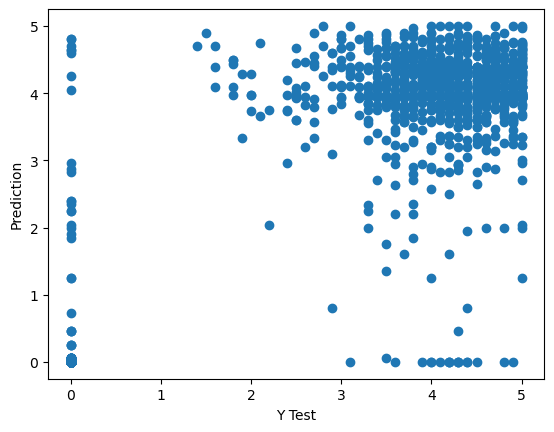

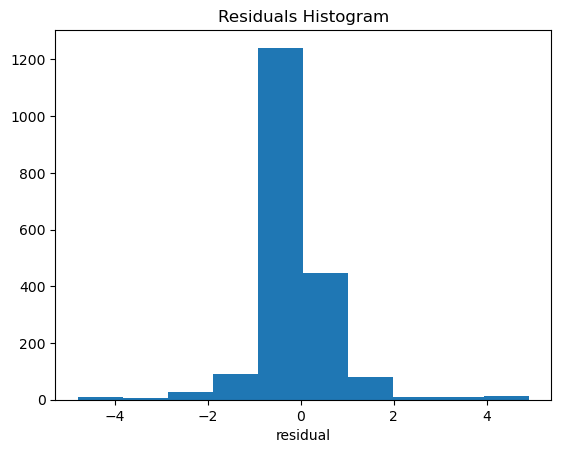

In [212]:
metrics.r2_score(y_test, y_pred6)

plt.scatter(y_test, y_pred6)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred6])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()


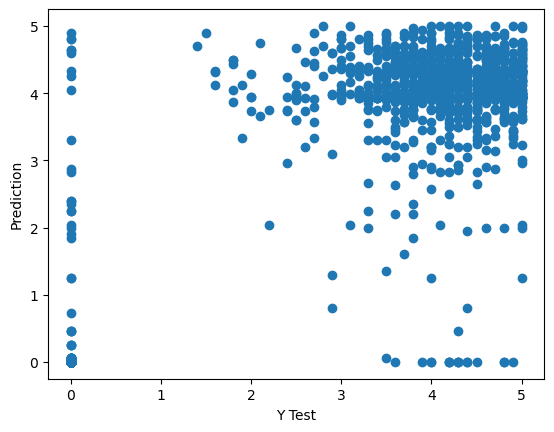

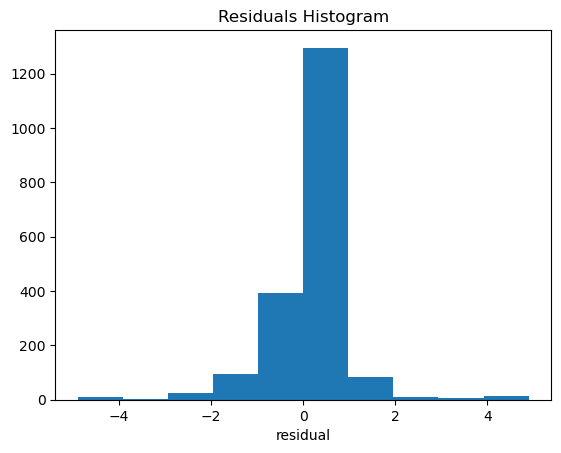

In [213]:
metrics.r2_score(y_test, y_pred7)

plt.scatter(y_test, y_pred7)
plt.xlabel('Y Test')
plt.ylabel('Prediction')
plt.show()

plt.hist([y_test-y_pred7])
plt.title('Residuals Histogram')
plt.xlabel('residual')
plt.show()
